<a href="https://colab.research.google.com/github/rodriquiel/Limpieza_datos_films/blob/main/Analisis_films.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importacion librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

#Importacion datos desde drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/TP Final/tmdb-box-office-prediction/train.csv')
ds.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


#Analisis de datos y variables

In [ ]:
ds.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
ds.shape

(3000, 23)

In [ ]:
ds.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


##Collection

In [ ]:
ds.belongs_to_collection.fillna('No collection',inplace=True)

In [ ]:
ds.belongs_to_collection[0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [ ]:
ds['collection'] = ds['belongs_to_collection']
for i in range(ds.shape[0]):
  if ds['collection'][i] == 'No collection':
    ds['belongs_to_collection'][i] = 0
  else:
    ds['belongs_to_collection'][i] = 1
ds

<ipython-input-10-6456ae84d391>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['belongs_to_collection'][i] = 1
<ipython-input-10-6456ae84d391>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['belongs_to_collection'][i] = 0


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[{'id': 313576, 'name': 'Hot Tub Time Machine ..."
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[{'id': 107674, 'name': 'The Princess Diaries ..."
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,No collection
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,No collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,No collection
2996,2997,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,No collection
2997,2998,0,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,No collection
2998,2999,0,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",h

In [ ]:
ds['belongs_to_collection'] = ds['belongs_to_collection'].astype(str).astype(int)

In [ ]:
ds['collection'][100]

'No collection'

In [ ]:
for i in range(ds.shape[0]):
  if ds['belongs_to_collection'][i] == 1:
    aux = ds['collection'][i]
    aux = aux.replace(', \'','; \'')
    aux = aux.replace('\'','')
    aux = aux.replace('[','')
    aux = aux.replace('{','')
    aux = aux.replace('}','')
    aux = aux.replace(']','')
    aux = aux.replace('\\','')
    aux = aux.replace('id: ','id =')
    aux = aux.replace(' name: ','name=')
    aux = aux.replace(' poster_path: ','poster_path=')
    aux = aux.replace(' backdrop_path: ','backdrop_path=')
    dic = dict(subString.split("=") for subString in aux.split(";"))
    coleccion = dic['name']
    ds['collection'][i] = coleccion

<ipython-input-13-09f209dff081>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['collection'][i] = coleccion


##Genres

In [ ]:
ds['genres'][100]

"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 80, 'name': 'Crime'}, {'id': 27, 'name': 'Horror'}]"

In [ ]:
for i in range(ds.shape[0]):
  if type(ds['genres'][i]) is float:
    print(ds['genres'][i])

nan
nan
nan
nan
nan
nan
nan


In [ ]:
for i in range(ds.shape[0]):
  if type(ds['genres'][i]) is str:
    aux = ds['genres'][i]
    aux = aux.replace('\'','')
    aux = aux.replace('[','')
    aux = aux.replace('{','')
    aux = aux.replace('}','')
    aux = aux.replace(']','')
    aux = aux.replace('id: ','id=')
    aux = aux.replace(' name: ','name=')
    lista = aux.split(',')
    lista_cat = []
    for j in range(1, len(lista), 2):
      dic = dict(subString.split("=") for subString in lista[j].split(";"))
      gen = dic['name']
      lista_cat.append(gen)
    ds['genres'][i] = lista_cat
  else:
    if type(ds['genres'][i]) is float:
      ds['genres'][i] = ['Unspecified']


<ipython-input-16-5d3b9a477adf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['genres'][i] = lista_cat
<ipython-input-16-5d3b9a477adf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['genres'][i] = ['Unspecified']


In [ ]:
ds

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
0,1,1,14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection
2,3,0,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,No collection
3,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection
4,5,0,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,No collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,0,"[Comedy, Romance]",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,No collection
2996,2997,0,0,"[Drama, Music]",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,No collection
2997,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,No collection
2998,2999,0,42000000,"[Comedy, Romance]",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, 

##Homepage

In [ ]:
ds.homepage.fillna('Unspecified',inplace=True)

In [ ]:
ds['have_homepage'] = ds['homepage']
for i in range(ds.shape[0]):
  if ds['have_homepage'][i] == 'Unspecified':
    ds['have_homepage'][i] = 0
  else:
    ds['have_homepage'][i] = 1

<ipython-input-19-f3215975e6fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['have_homepage'][i] = 0
<ipython-input-19-f3215975e6fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['have_homepage'][i] = 1


In [ ]:
ds['have_homepage'] = ds['have_homepage'].astype(str).astype(int)

##Budget

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   int64  
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               3000 non-null   object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
filtro = ds['budget'] != 0
ds = ds[filtro]
ds

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection,have_homepage
0,1,1,14000000,[Comedy],Unspecified,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0
2,3,0,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,No collection,1
3,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1
5,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2993,0,1135654,"[Action, Adventure, Drama, Family, Fantasy]",Unspecified,tt0015400,en,The Thief of Bagdad,A recalcitrant thief vies with a duplicitous M...,3.878515,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,"""Happiness Must Be Earned""",The Thief of Bagdad,"[{'id': 255, 'name': 'male nudity'}, {'id': 14...","[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'credit_id': '52fe45bec3a368484e06c70b', 'de...",1213880,No collection,0
2993,2994,0,60000000,"[Comedy, Drama]",http://www.theterminal-themovie.com/,tt0362227,en,The Terminal,Viktor Navorski is a man without a country; hi...,14.092373,...,"[{'iso_639_1': 'bg', 'name': 'български език'}...",Released,Life is waiting.,The Terminal,"[{'id': 242, 'name': 'new york'}, {'id': 822, ...","[{'cast_id': 4, 'character': 'Viktor Navorski'...","[{'credit_id': '52fe4259c3a36847f8017699', 'de...",219417255,No collection,1
2997,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",Unspecified,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,No collection,0
2998,2999,0,42000000,"[Comedy, Romance]",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a g

###Exclusion outliers

<Axes: >

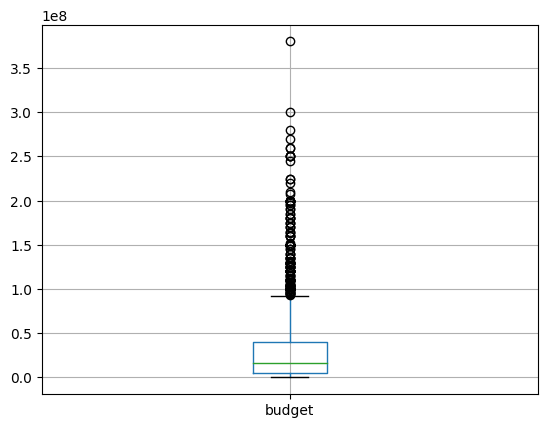

In [ ]:
ds.boxplot(['budget'])

In [ ]:
data_budget = ds['budget']

In [ ]:
Q1 = data_budget.quantile(0.25)
Q3 = data_budget.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_budget >= lim_inf) & (data_budget <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(2034, 25)

<Axes: >

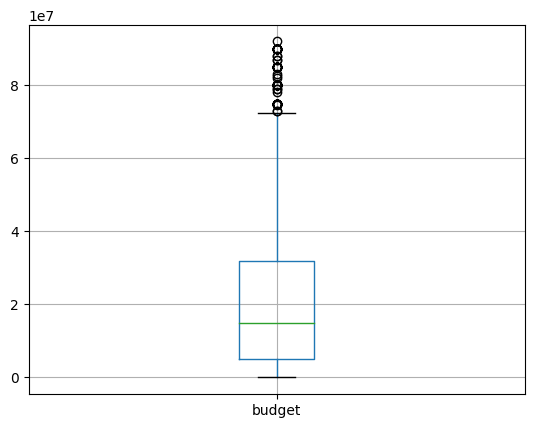

In [ ]:
prueba.boxplot(['budget'])

In [ ]:
ds = prueba

##Popularity

###Exclusion outliers

<Axes: >

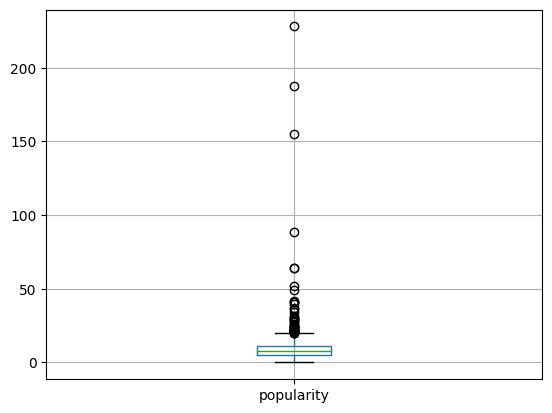

In [ ]:
ds.boxplot(['popularity'])

In [ ]:
data_popularity = ds['popularity']

In [ ]:
Q1 = data_popularity.quantile(0.25)
Q3 = data_popularity.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_popularity >= lim_inf) & (data_popularity <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(1991, 25)

<Axes: >

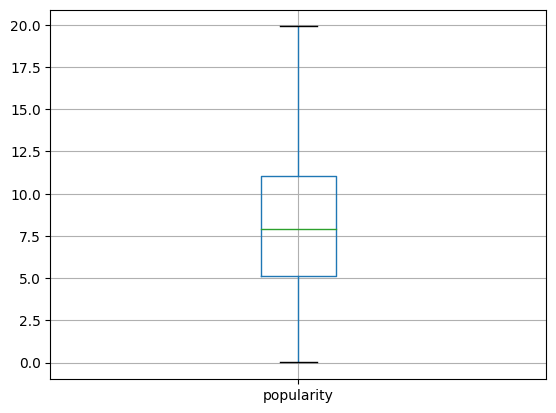

In [ ]:
prueba.boxplot(['popularity'])

In [ ]:
ds = prueba

##Revenue

###Exclusion outliers

<Axes: >

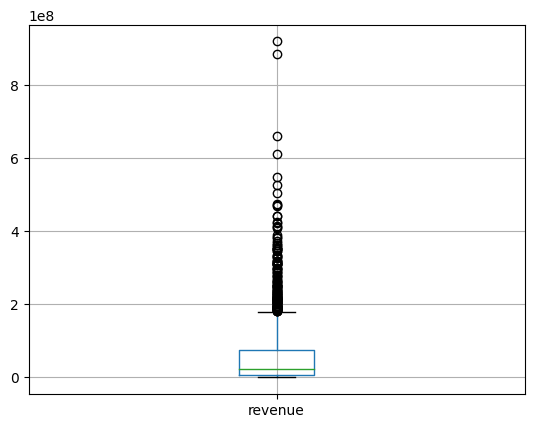

In [ ]:
ds.boxplot(['revenue'])

In [ ]:
data_revenue = ds['revenue']

In [ ]:
Q1 = data_revenue.quantile(0.25)
Q3 = data_revenue.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_revenue >= lim_inf) & (data_revenue <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(1843, 25)

<Axes: >

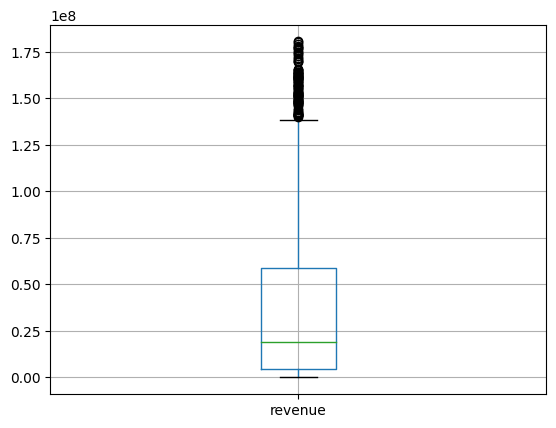

In [ ]:
prueba.boxplot(['revenue'])

In [ ]:
ds = prueba

##Poster_path, imdb_id, overview, tagline, keywords

In [ ]:
ds.drop(columns = ['poster_path','imdb_id','overview','tagline','Keywords'],inplace = True)
ds

<ipython-input-47-1c316c1f678e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns = ['poster_path','imdb_id','overview','tagline','Keywords'],inplace = True)


,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,collection,have_homepage
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0
3,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1
5,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0
6,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,2992,1,13000000,"[Drama, Family, Romance, Music]",Unspecified,en,Save the Last Dance,4.794088,"[{'name': 'MTV Films', 'id': 746}, {'name': 'C...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/12/01,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Save the Last Dance,"[{'cast_id': 18, 'character': 'Sara Johnson', ...","[{'credit_id': '52fe4533c3a36847f80c1c6b', 'de...",91038276,Save The Last Dance Collection,0
2992,2993,0,1135654,"[Action, Adventure, Drama, Family, Fantasy]",Unspecified,en,The Thief of Bagdad,3.878515,"[{'name': 'Douglas Fairbanks Pictures', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",3/18/24,149.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,The Thief of Bagdad,"[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'credit_id': '52fe45bec3a368484e06c70b', 'de...",1213880,No collection,0
2997,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",Unspecified,en,The Long Kiss Goodnight,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,No collection,0
2998,2999,0,42000000,"[Comedy, Romance]",http://www.alongcamepolly.com/,en,Along Came Polly,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,No collection

In [ ]:
ds.reset_index(drop=True, inplace=True)
ds.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,collection,have_homepage
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0
4,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1


##Production_companies

In [ ]:
#ds['production_companies'][870] = str([{'name': 'Todman Simon LeMasters Productions', 'id': 2507}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'Peters Entertainment', 'id': 16774}, {'name': 'Sonnenfeld Josephson Worldwide Entertainment', 'id': 57088}])
#ds['production_companies'][1011] = str([{'name': 'Yellow Black & White', 'id': 42877}])
#ds['production_companies'][1304] = str([{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Jackson/McHenry Company, The', 'id': 37350}, {'name': 'Jacmac Films', 'id': 73997}])
#ds['production_companies'][2514] = str([{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'Enigma Productions', 'id': 7049}, {'name': 'The Ladd Company', 'id': 7965}, {'name': 'Allied Stars Ltd.', 'id': 8770}])
#ds['production_companies'][2540] = str([{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Friday Four Inc.', 'id': 93280}])
#ds['production_companies'][2808] = str([{'name': 'Matador Pictures', 'id': 707}, {'name': 'Arcadia Motion Pictures', 'id': 7543}, {'name': 'uFilm', 'id': 8676}, {'name': 'Afrodita Audiovisual A.I.E.', 'id': 10069}, {'name': 'Le Tax Shelter du Gouvernement Fédéral de Belgique', 'id': 11921}, {'name': 'Telefónica Producciones', 'id': 16742}, {'name': 'Umedia', 'id': 19037}, {'name': 'Entertainment Motion Pictures', 'id': 20386}, {'name': 'Cinema One', 'id': 49252}, {'name': 'Nix Films', 'id': 53195}, {'name': 'International Pictures Two', 'id': 66897}, {'name': 'Cronos Entertainment AIE', 'id': 66899}])
#ds['production_companies'][3164] = str([{'name': 'Screen Gems Inc.', 'id': 127}])

In [ ]:
ds.production_companies.fillna('Unspecified',inplace=True)

<ipython-input-50-7c85353f9b73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.production_companies.fillna('Unspecified',inplace=True)


In [ ]:
for i in range(ds.shape[0]):
  if ds['production_companies'][i] != 'Unspecified':
    aux = ds['production_companies'][i]
    aux = aux.replace('\'','')
    aux = aux.replace('[','')
    aux = aux.replace('{','')
    aux = aux.replace('}','')
    aux = aux.replace(']','')
    aux = aux.replace(',The',' The')
    aux = aux.replace(' id: ','id=')
    aux = aux.replace('name: ','name=')
    aux = aux.replace(' n','n')
    aux = aux.replace(', ',' ')
    #aux = aux.replace(', A',' A')
    #aux = aux.replace(', I',' I')
    #aux = aux.replace(', T',' T')
    #print(i,': ',aux)
    lista = aux.split(',')
    lista_cat = []
    for j in range(0, len(lista), 2):
      dic = dict(subString.split("=") for subString in lista[j].split(";"))
      nom = dic['name']
      lista_cat.append(nom)
    ds['production_companies'][i] = lista_cat

<ipython-input-51-a5f5db3eaed2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['production_companies'][i] = lista_cat


In [ ]:
ds['production_companies_number'] = ds['production_companies']
for i in range(ds.shape[0]):
    num = len(ds['production_companies_number'][i])
    ds['production_companies_number'][i] = num

<ipython-input-52-c17d5269e5f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['production_companies_number'][i] = num


In [ ]:
ds.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,cast,crew,revenue,collection,have_homepage,production_companies_number
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0,3
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0,1
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1,11
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,NaN,...,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0,11
4,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[Ghost House Pictures, North Box Productions]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1,2


In [ ]:
ds['production_companies_number'] = ds['production_companies_number'].astype(str).astype(int)

##Production_countries

In [ ]:
ds['production_countries'][1]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [ ]:
ds.production_countries.fillna('Unspecified',inplace=True)

In [ ]:
for i in range(ds.shape[0]):
  if ds['production_countries'][i] != 'Unspecified':
    aux = ds['production_countries'][i]
    aux = aux.replace('\'','')
    aux = aux.replace('[','')
    aux = aux.replace('{','')
    aux = aux.replace('}','')
    aux = aux.replace(']','')
    aux = aux.replace('iso_3166_1: ','id=')
    aux = aux.replace(' name: ','name=')
    #print(aux)
    lista = aux.split(',')
    lista_cat = []
    for j in range(1, len(lista), 2):
      dic = dict(subString.split("=") for subString in lista[j].split(";"))
      #print(dic)
      nom = dic['name']
      lista_cat.append(nom)
    ds['production_countries'][i] = lista_cat

<ipython-input-57-eed720e5f255>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['production_countries'][i] = lista_cat


In [ ]:
ds['production_countries_number'] = ds['production_countries']
for i in range(ds.shape[0]):
    num = len(ds['production_countries_number'][i])
    ds['production_countries_number'][i] = num

<ipython-input-58-2ac6d83c8494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['production_countries_number'][i] = num


In [ ]:
ds['usa_production_country'] = ds['production_countries']
for i in range(ds.shape[0]):
  if "United States of America" in ds['usa_production_country'][i]:
    ds['usa_production_country'][i] = 1
  else:
    ds['usa_production_country'][i] = 0

<ipython-input-59-f5bdeb595910>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['usa_production_country'][i] = 1
<ipython-input-59-f5bdeb595910>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['usa_production_country'][i] = 0


In [ ]:
ds.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,status,title,cast,crew,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],...,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0,3,1,1
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],[United States of America],...,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0,1,1,1
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,[India],...,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1,11,1,0
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,Unspecified,...,Released,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0,11,11,0
4,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[Ghost House Pictures, North Box Productions]","[United States of America, Canada]",...,Released,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1,2,2,1


In [ ]:
ds['usa_production_country'] = ds['usa_production_country'].astype(str).astype(int)
ds['production_countries_number'] = ds['production_countries_number'].astype(str).astype(int)

##Spoken_languages

In [ ]:
ds.spoken_languages.fillna('Unspecified',inplace=True)

In [ ]:
for i in range(ds.shape[0]):
  if ds['spoken_languages'][i] != 'Unspecified':
    aux = ds['spoken_languages'][i]
    aux = aux.replace('\'','')
    aux = aux.replace('[','')
    aux = aux.replace('{','')
    aux = aux.replace('}','')
    aux = aux.replace(']','')
    aux = aux.replace('iso_639_1: ','id=')
    aux = aux.replace(' name: ','name=')
    #print(aux)
    lista = aux.split(',')
    lista_cat = []
    for j in range(1, len(lista), 2):
      dic = dict(subString.split("=") for subString in lista[j].split(";"))
      #print(dic)
      nom = dic['name']
      lista_cat.append(nom)
    ds['spoken_languages'][i] = lista_cat

<ipython-input-63-4fbd3d3b7540>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['spoken_languages'][i] = lista_cat


In [ ]:
ds['english_spoken_language'] = ds['spoken_languages']
for i in range(ds.shape[0]):
  if 'English' in ds['english_spoken_language'][i]:
    ds['english_spoken_language'][i] = 1
  else:
    ds['english_spoken_language'][i] = 0

<ipython-input-64-18828bc54bc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['english_spoken_language'][i] = 1
<ipython-input-64-18828bc54bc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['english_spoken_language'][i] = 0


In [ ]:
ds.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,title,cast,crew,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],...,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0,3,1,1,1
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],[United States of America],...,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0,1,1,1,1
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,[India],...,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1,11,1,0,1
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,Unspecified,...,Pinocchio and the Emperor of the Night,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0,11,11,0,1
4,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[Ghost House Pictures, North Box Productions]","[United States of America, Canada]",...,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1,2,2,1,1


In [ ]:
ds['english_spoken_language'] = ds['english_spoken_language'].astype(str).astype(int)

##Cast y crew

###Cast

In [ ]:
print(ds['cast'][0].count('name'))

24


In [ ]:
ds.cast.fillna('Unspecified',inplace=True)

In [ ]:
ds['cast_number'] = ds['cast']
for i in range(ds.shape[0]):
  if ds['cast_number'][i] != 'Unspecified':
    num = ds['cast_number'][i].count('name')
    ds['cast_number'][i] = num
  else:
    ds['cast_number'][i] = -1

<ipython-input-69-4293817458c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['cast_number'][i] = num
<ipython-input-69-4293817458c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['cast_number'][i] = -1


In [ ]:
ds

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,cast,crew,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language,cast_number
0,1,1,14000000,[Comedy],Unspecified,en,Hot Tub Time Machine 2,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,0,3,1,1,1,24
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],[United States of America],...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,0,1,1,1,1,20
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,[India],...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,No collection,1,11,1,0,1,7
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,Unspecified,...,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,No collection,0,11,11,0,1,4
4,7,0,14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,en,The Possession,7.286477,"[Ghost House Pictures, North Box Productions]","[United States of America, Canada]",...,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,No collection,1,2,2,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,2992,1,13000000,"[Drama, Family, Romance, Music]",Unspecified,en,Save the Last Dance,4.794088,"[MTV Films, Cort/Madden Productions]",[United States of America],...,"[{'cast_id': 18, 'character': 'Sara Johnson', ...","[{'credit_id': '52fe4533c3a36847f80c1c6b', 'de...",91038276,Save The Last Dance Collection,0,2,1,1,1,21
1839,2993,0,1135654,"[Action, Adventure, Drama, Family, Fantasy]",Unspecified,en,The Thief of Bagdad,3.878515,[Douglas Fairbanks Pictures],[United States of America],...,"[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'credit_id': '52fe45bec3a368484e06c70b', 'de...",1213880,No collection,0,1,1,1,0,21
1840,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",Unspecified,en,The Long Kiss Goodnight,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],...,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,No collection,0,3,1,1,1,15
1841,2999,0,42000000,"[Comedy, Romance]",http://www.alongcamepolly.com/,en,Along Came Polly,15.725542,"[Jersey Films, Loofah Productions]",[United States of America],...,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,No collection,1,2,1,1,1,26


In [ ]:
ds['cast_number'] = ds['cast_number'].astype(str).astype(int)

###Exclusion outliers

<Axes: >

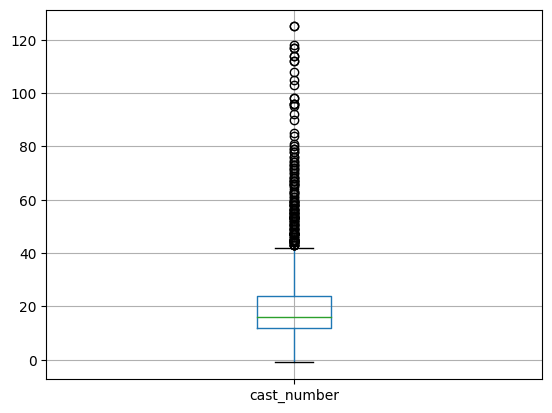

In [ ]:
ds.boxplot(['cast_number'])

In [ ]:
data_cast_number = ds['cast_number']

In [ ]:
Q1 = data_cast_number.quantile(0.25)
Q3 = data_cast_number.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_cast_number >= lim_inf) & (data_cast_number <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(1687, 25)

<Axes: >

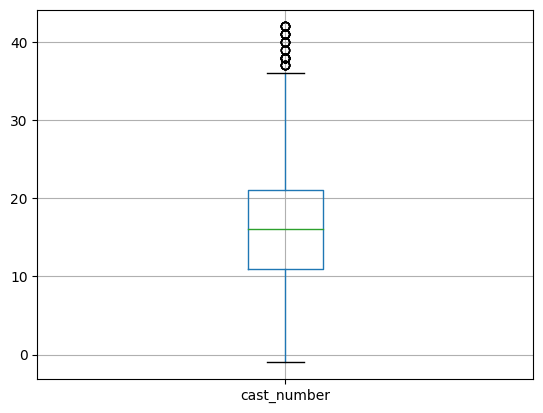

In [ ]:
prueba.boxplot(['cast_number'])

In [ ]:
ds = prueba

In [ ]:
ds.reset_index(drop=True, inplace=True)

###Crew

In [ ]:
ds.crew.fillna('Unspecified',inplace=True)

<ipython-input-81-37a8be9e5451>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.crew.fillna('Unspecified',inplace=True)


In [ ]:
ds['crew_number'] = ds['crew']
for i in range(ds.shape[0]):
  if ds['crew_number'][i] != 'Unspecified':
    num = ds['crew_number'][i].count('name')
    ds['crew_number'][i] = num
  else:
    ds['crew_number'][i] = -1

<ipython-input-82-f2dcb293ed66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['crew_number'] = ds['crew']
<ipython-input-82-f2dcb293ed66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['crew_number'][i] = num
<ipython-input-82-f2dcb293ed66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['crew_number'][i] = -1


In [ ]:
ds['crew_number'] = ds['crew_number'].astype(str).astype(int)

<ipython-input-83-2b3a7482f47f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['crew_number'] = ds['crew_number'].astype(str).astype(int)


###Exclusion outliers

<Axes: >

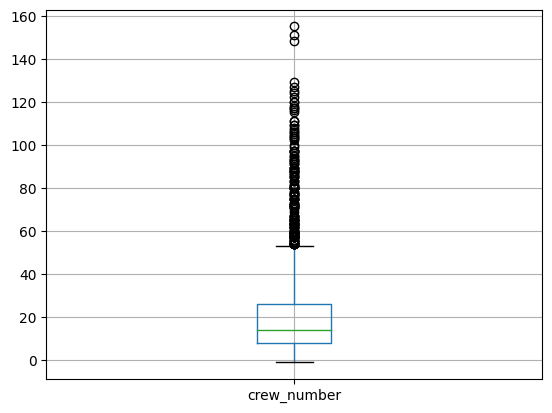

In [ ]:
ds.boxplot(['crew_number'])

In [ ]:
data_crew_number = ds['crew_number']

In [ ]:
Q1 = data_crew_number.quantile(0.25)
Q3 = data_crew_number.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_crew_number >= lim_inf) & (data_crew_number <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(1516, 26)

<Axes: >

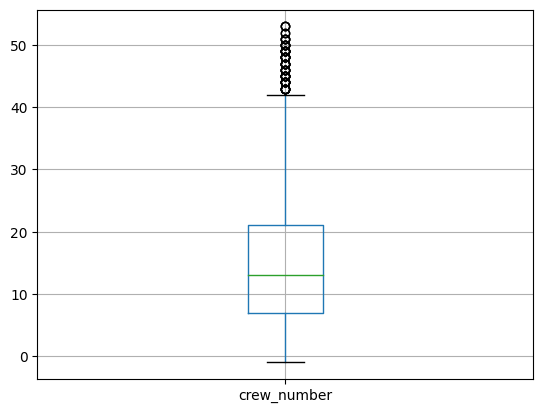

In [ ]:
prueba.boxplot(['crew_number'])

In [ ]:
ds = prueba

In [ ]:
ds.drop(ds[(ds['cast_number'] == -1) | (ds['crew_number'] == -1)].index, inplace=True)

<ipython-input-92-fbf133bcde30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(ds[(ds['cast_number'] == -1) | (ds['crew_number'] == -1)].index, inplace=True)


In [ ]:
ds.drop(columns = ['cast','crew'], inplace = True)

<ipython-input-93-64b38ad2ba62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns = ['cast','crew'], inplace = True)


In [ ]:
ds

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,title,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language,cast_number,crew_number
1,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],[United States of America],...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,0,1,1,1,1,20,9
2,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,[India],...,Kahaani,16000000,No collection,1,11,1,0,1,7,3
3,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,Unspecified,...,Pinocchio and the Emperor of the Night,3261638,No collection,0,11,11,0,1,4,11
5,10,0,6000000,"[Comedy, Music]",Unspecified,en,A Mighty Wind,4.672036,[Castle Rock Entertainment],[United States of America],...,A Mighty Wind,18750246,No collection,0,1,1,1,1,20,11
6,11,1,1000000,[Drama],Unspecified,en,Rocky,14.774066,[United Artists],[United States of America],...,Rocky,117235147,Rocky Collection,0,1,1,1,1,37,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,2987,0,20000000,"[Action, Drama, Thriller]",Unspecified,en,Paparazzi,12.553403,"[Icon Productions, Twentieth Century Fox Film ...",[United States of America],...,Paparazzi,16605763,No collection,0,3,1,1,1,10,34
1682,2992,1,13000000,"[Drama, Family, Romance, Music]",Unspecified,en,Save the Last Dance,4.794088,"[MTV Films, Cort/Madden Productions]",[United States of America],...,Save the Last Dance,91038276,Save The Last Dance Collection,0,2,1,1,1,21,21
1683,2993,0,1135654,"[Action, Adventure, Drama, Family, Fantasy]",Unspecified,en,The Thief of Bagdad,3.878515,[Douglas Fairbanks Pictures],[United States of America],...,The Thief of Bagdad,1213880,No collection,0,1,1,1,0,21,28
1684,2998,0,65000000,"[Crime, Action, Mystery, Thriller]",Unspecified,en,The Long Kiss Goodnight,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],...,The Long Kiss Goodnight,89456761,No collection,0,3,1,1,1,15,10


##Status

In [ ]:
ds.status.unique()

array(['Released', 'Rumored'], dtype=object)

In [ ]:
ds[ds.status == 'Post Production']

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,title,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language,cast_number,crew_number


In [ ]:
ds[ds.status == 'Rumored']

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,title,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language,cast_number,crew_number
896,1619,0,891000,[Documentary],Unspecified,en,A Place Called Chiapas,0.179246,Unspecified,[Canada],...,A Place Called Chiapas,229000,No collection,0,11,1,0,1,1,1


In [ ]:
ds.drop([896], axis = 0, inplace=True)
ds.reset_index(drop=True, inplace=True)

In [ ]:
ds.drop(columns = ['status'], inplace = True)

##Original_language

In [ ]:
ds['english_original_language'] = ds['original_language']
for i in range(ds.shape[0]):
  if ds['english_original_language'][i] == 'en':
    ds['english_original_language'][i] = 1
  else:
    ds['english_original_language'][i] = 0

<ipython-input-100-0fe34280e028>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['english_original_language'][i] = 1
<ipython-input-100-0fe34280e028>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['english_original_language'][i] = 0


In [ ]:
ds['english_original_language'] = ds['english_original_language'].astype(str).astype(int)

In [ ]:
ds.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,...,revenue,collection,have_homepage,production_companies_number,production_countries_number,usa_production_country,english_spoken_language,cast_number,crew_number,english_original_language
0,2,1,40000000,"[Comedy, Drama, Family, Romance]",Unspecified,en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],[United States of America],...,95149435,The Princess Diaries Collection,0,1,1,1,1,20,9,1
1,4,0,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,hi,Kahaani,3.174936,Unspecified,[India],...,16000000,No collection,1,11,1,0,1,7,3,0
2,6,0,8000000,"[Animation, Adventure, Family]",Unspecified,en,Pinocchio and the Emperor of the Night,0.743274,Unspecified,Unspecified,...,3261638,No collection,0,11,11,0,1,4,11,1
3,10,0,6000000,"[Comedy, Music]",Unspecified,en,A Mighty Wind,4.672036,[Castle Rock Entertainment],[United States of America],...,18750246,No collection,0,1,1,1,1,20,11,1
4,11,1,1000000,[Drama],Unspecified,en,Rocky,14.774066,[United Artists],[United States of America],...,117235147,Rocky Collection,0,1,1,1,1,37,31,1


##Runtime

In [ ]:
ds.dropna(subset=["runtime"], inplace = True)
ds.reset_index(drop=True, inplace=True)

###Exclusion outliers

<Axes: >

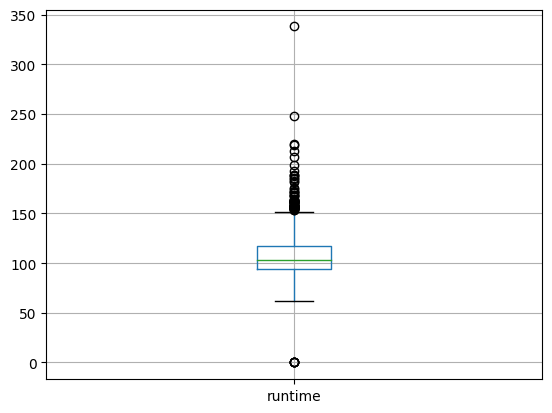

In [ ]:
ds.boxplot(['runtime'])

In [ ]:
data_runtime = ds['runtime']

In [ ]:
Q1 = data_runtime.quantile(0.25)
Q3 = data_runtime.quantile(0.75)
IIQ = Q3 - Q1 #Intervalo intercuartil
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
seleccion = (data_runtime >= lim_inf) & (data_runtime <= lim_sup)

In [ ]:
prueba = ds[seleccion]

In [ ]:
prueba.shape

(1438, 24)

<Axes: >

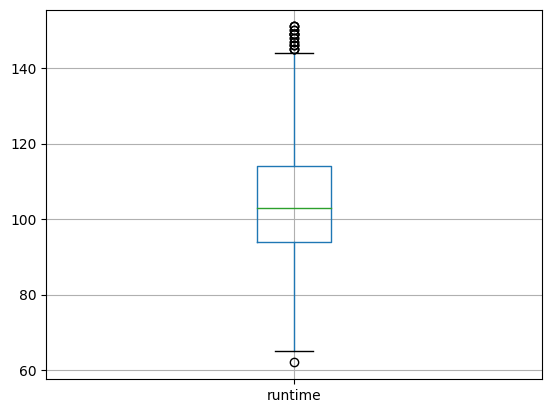

In [ ]:
prueba.boxplot(['runtime'])

In [ ]:
ds = prueba

##Reordenamiento columnas

In [ ]:
ds.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'title', 'revenue', 'collection',
       'have_homepage', 'production_companies_number',
       'production_countries_number', 'usa_production_country',
       'english_spoken_language', 'cast_number', 'crew_number',
       'english_original_language'],
      dtype='object')

In [ ]:
nuevas_col = ['id',
              'title','original_title',
              'belongs_to_collection','collection',
              'have_homepage','homepage',
              'budget',
              'genres',
              'runtime',
              'release_date',
              'original_language','english_original_language',
              'spoken_languages','english_spoken_language',
              'cast_number','crew_number',
              'production_companies','production_companies_number',
              'production_countries','production_countries_number','usa_production_country',
              'popularity',
              'revenue']

In [ ]:
ds = ds[nuevas_col]

In [ ]:
ds.head()

,id,title,original_title,belongs_to_collection,collection,have_homepage,homepage,budget,genres,runtime,...,english_spoken_language,cast_number,crew_number,production_companies,production_companies_number,production_countries,production_countries_number,usa_production_country,popularity,revenue
0,2,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,1,The Princess Diaries Collection,0,Unspecified,40000000,"[Comedy, Drama, Family, Romance]",113.0,...,1,20,9,[Walt Disney Pictures],1,[United States of America],1,1,8.248895,95149435
1,4,Kahaani,Kahaani,0,No collection,1,http://kahaanithefilm.com/,1200000,"[Thriller, Drama]",122.0,...,1,7,3,Unspecified,11,[India],1,0,3.174936,16000000
2,6,Pinocchio and the Emperor of the Night,Pinocchio and the Emperor of the Night,0,No collection,0,Unspecified,8000000,"[Animation, Adventure, Family]",83.0,...,1,4,11,Unspecified,11,Unspecified,11,0,0.743274,3261638
3,10,A Mighty Wind,A Mighty Wind,0,No collection,0,Unspecified,6000000,"[Comedy, Music]",91.0,...,1,20,11,[Castle Rock Entertainment],1,[United States of America],1,1,4.672036,18750246
4,11,Rocky,Rocky,1,Rocky Collection,0,Unspecified,1000000,[Drama],119.0,...,1,37,31,[United Artists],1,[United States of America],1,1,14.774066,117235147


In [ ]:
ds.shape

(1438, 24)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1509
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1438 non-null   int64  
 1   title                        1438 non-null   object 
 2   original_title               1438 non-null   object 
 3   belongs_to_collection        1438 non-null   int64  
 4   collection                   1438 non-null   object 
 5   have_homepage                1438 non-null   int64  
 6   homepage                     1438 non-null   object 
 7   budget                       1438 non-null   int64  
 8   genres                       1438 non-null   object 
 9   runtime                      1438 non-null   float64
 10  release_date                 1438 non-null   object 
 11  original_language            1438 non-null   object 
 12  english_original_language    1438 non-null   int64  
 13  spoken_languages  

<ipython-input-119-f7fd4893b049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ds.corr(), annot=True)


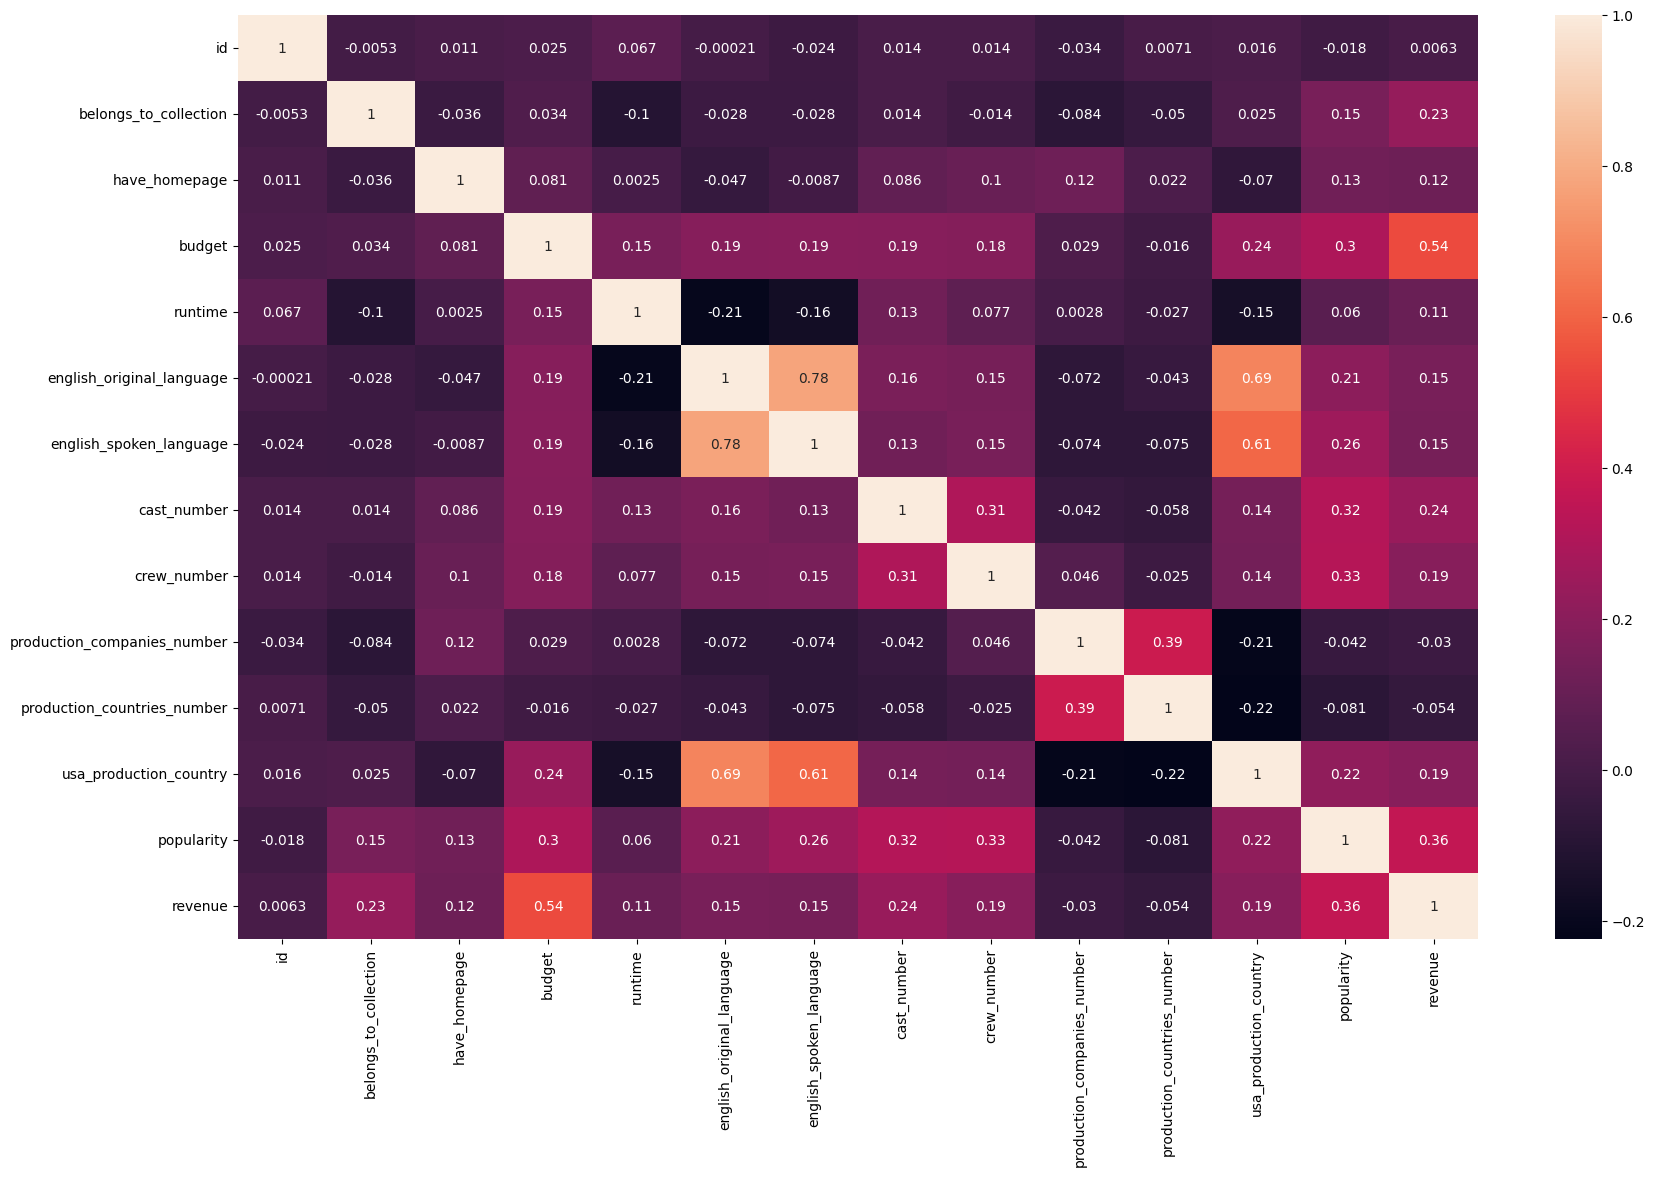

In [ ]:
sns.heatmap(data=ds.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

#Aplicacion de Arbol de decision

In [ ]:
X = ds.drop(columns = ['id',
              'title','original_title',
              'collection',
              'homepage',
              'genres',
              'release_date',
              'original_language',
              'spoken_languages',
              'production_companies','production_companies_number',
              'production_countries','production_countries_number',
              'revenue',])    #drop quita una columna de un dataframe, y devuelve otra dataframe
y = ds['revenue']                 #Asignamos únicamente la columna de interés

Funciones para muestras resultados

In [ ]:
# DataFrame para una evaluación general al final
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

##Modelo con datos escalados

Consiste en eliminar el valor medio de los datos y llevarlos a escala de forma que su desviación estándar sea 1

Preparacion de datos para entrenamiento y prueba

In [ ]:
SEED = 42
np.random.seed(SEED) #Para establecer estado de aleatoreidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(f'Se entrenó al modelo con {len(X_train)} elementos y se utilizan de prueba {len(X_test)} elementos')

Se entrenó al modelo con 1078 elementos y se utilizan de prueba 360 elementos


Aplicacion del DecisionTreeClassifier con datos escalados y profundidad maxima = 3

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# Marca de tiempo para tomar métricas
start = time.time()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Entrenamiento
model = DecisionTreeClassifier(max_depth = 3,random_state=1)
model.fit(X_train,y_train)
end_train = time.time()

#Predicciones
predicciones = model.predict(X_test)
end_predict = time.time()

#Muestra resultados
print("Classification Report: \n", classification_report(y_test, predicciones))
muestra_metricas("DecisionTreeClassifier", y_test, predicciones, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         0
         198       0.00      0.00      0.00         1
        3358       0.00      0.00      0.00         1
        6147       0.00      0.00      0.00         1
       14000       0.00      0.00      0.00         1
       14904       0.00      0.00      0.00         1
       23859       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         1
       25900       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         1
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

###Vista del arbol en forma de grafo

In [ ]:
features = X.columns
dot_data = export_graphviz(model, feature_names = features)
grafico = graphviz.Source(dot_data)

Arbol de decision con datos escalados

In [ ]:
grafico

## Definicion Entradas y Salidas

In [ ]:
X = ds.drop(columns = ['id',
              'title','original_title',
              'collection',
              'homepage',
              'genres',
              'release_date',
              'original_language',
              'spoken_languages',
              'production_companies','production_companies_number',
              'production_countries','production_countries_number',
              'revenue',])    #drop quita una columna de un dataframe, y devuelve otra dataframe
y = ds['revenue']                 #Asignamos únicamente la columna de interés

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

In [ ]:
X.info()

###Informacion Mutua

In [ ]:
df_importances = pd.DataFrame({
    'Variables': X.columns,
    'Información Mutua': mutual_info_regression(X, y),
})

df_importances.sort_values(by='Información Mutua', ascending=False)

###Regresion Lineal

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
df_coef = pd.DataFrame(data=lr.coef_, index=X.columns, columns=['Coeficientes'])
df_coef

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
# Gráfica de resultados
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_lr, y=y_test)

plt.xlabel('Predicción Regresión Lineal')
plt.ylabel('y_test')

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_lr)))
print('R squared: ', r2_score(y_test, pred_lr))

In [ ]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_lr, label='curva predicha')

plt.title('Regresión Lineal', fontsize=20)
plt.legend()

### Random Forest

In [ ]:
# Regresión aleatoria con 'n_estimators' árboles secundarios
rf = RandomForestRegressor(n_estimators=60, random_state=111)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [ ]:
# Gráfica de resultados
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_rf, y=y_test)

plt.xlabel('Predicción Random Forest')
plt.ylabel('y_test')
# La relación lineal entre el valor predicho y el valor real, ahora es mucho más fuerte que en el modelo anterior.
# Esto denota que la precisión del modelo es buena.

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('R squared: ', r2_score(y_test, pred_rf))

#a

In [ ]:
# número de árboles en un bosque aleatorio
n_estimators = np.arange(50, 500, 25)
# número de características a considerar al buscar la mejor división
max_features = ['sqrt', 'log2']
# número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 4]
# número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

In [ ]:
# Crearemos una grilla de parámetros
param_grid = {
            "n_estimators" : n_estimators,
            "max_features" : max_features,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf" : min_samples_leaf,
            "bootstrap" : bootstrap
            }

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
# Se prepara el objeto encargado de probar las combinaciones elegidas
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)
                # cv: cross-validation, Para entradas de int/None, si el estimador es un clasificador y y es binario o multiclase, se utiliza StratifiedKFold. En todos los demás casos, se utiliza KFold
                # n_jobs: Número de trabajos a ejecutar en paralelo. None significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores.

In [ ]:
rf_grid.fit(X_train, y_train) # Tarda unos 7 min

In [ ]:
# Obtendremos los mejores parámetros
rf_grid.best_params_

In [ ]:
# Creamos el modelo con los parámetros óptimos (del espacio que buscamos)
rf_tuneado = RandomForestRegressor(**rf_grid.best_params_)  # Acá entra el desempaquetado del diccionario para los parámetros (**)

In [ ]:
rf_tuneado.fit(X_train, y_train)

In [ ]:
pred_rf_tuneado = rf_tuneado.predict(X_test)

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_tuneado)))
print('R squared: ', r2_score(y_test, pred_rf_tuneado))